In [1]:
%%bash
pip install scprep
pip install phate
pip install umap-learn

  Using cached scprep-1.2.3-py3-none-any.whl (94 kB)
  Using cached phate-1.0.11-py3-none-any.whl (23 kB)
  Using cached graphtools-1.5.3-py3-none-any.whl (45 kB)
  Using cached tasklogger-1.2.0-py3-none-any.whl (14 kB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl (9.6 kB)
  Using cached s_gd2-1.8.1-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (417 kB)
  Using cached PyGSP-0.5.1-py2.py3-none-any.whl (1.8 MB)
  Using cached wrapt-1.15.0-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (78 kB)
  Using cached umap_learn-0.5.4-py3-none-any.whl
  Using cached numba-0.58.0-cp39-cp39-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.6 MB)
  Using cached pynndescent-0.5.10-py3-none-any.whl
  Using cached tbb-2021.10.0-py2.py3-none-manylinux1_x86_64.whl (4.4 MB)
  Using cached llvmlite-0.41.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.6 MB)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import phate
import umap
import scprep
import os

In [3]:
## Read in the MYELOID counts 
myeloid_data = scprep.io.load_csv( "Brain_Myeloid-counts.csv",
                          cell_axis='row', sparse=True).transpose()
myeloid_data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
O5.MAA000570.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,151.0,0.0,7.0,36.0,0.0,0.0,0.0
C3.MAA000570.3_8_M.1.1,0.0,348.0,0.0,0.0,0.0,686.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F17.MAA000570.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I17.MAA000570.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,13.0,206.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
K17.MAA000570.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
myeloid_data.shape

(4762, 23433)

In [5]:
## Read in the NON-MYELOID counts 
non_mye_data = scprep.io.load_csv( "Brain_Non-Myeloid-counts.csv",
                          cell_axis='row', sparse=True).transpose()

non_mye_data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
E19.MAA000538.3_8_M.1.1,0.0,162.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0
M6.MAA000538.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P7.MAA000538.3_8_M.1.1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0
F5.MAA000538.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M7.MAA000538.3_8_M.1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data = [myeloid_data, non_mye_data]
batch_labels = ['myeloid_data', 'non_mye_data']
data, sample_labels = scprep.utils.combine_batches(data, batch_labels)

In [10]:
lookup = pd.Series(data.index).apply(lambda x: x.split('.')[1])
metadata = pd.read_csv('metadata_FACS.csv', index_col=0).loc[lookup.values].reset_index()
metadata.index = data.index
metadata.head()

,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex
O5.MAA000570.3_8_M.1.1_myeloid_data,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M
C3.MAA000570.3_8_M.1.1_myeloid_data,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M
F17.MAA000570.3_8_M.1.1_myeloid_data,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M
I17.MAA000570.3_8_M.1.1_myeloid_data,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M
K17.MAA000570.3_8_M.1.1_myeloid_data,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M


<AxesSubplot:title={'center':'Library size before filtering'}, xlabel='Library size', ylabel='Number of cells'>

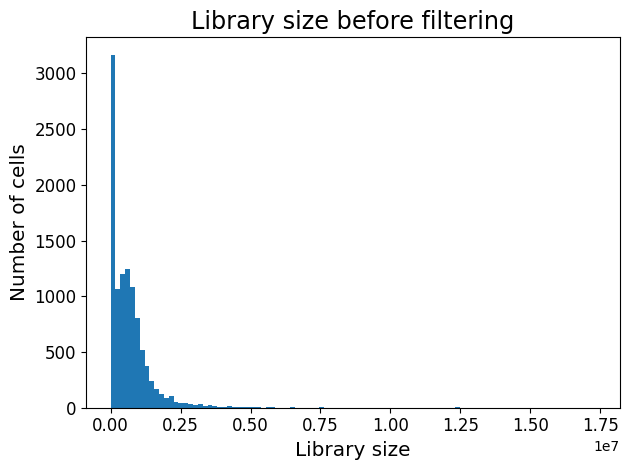

In [11]:
scprep.plot.plot_library_size(data, log=False, title='Library size before filtering')

<AxesSubplot:xlabel='Library size', ylabel='Number of cells'>

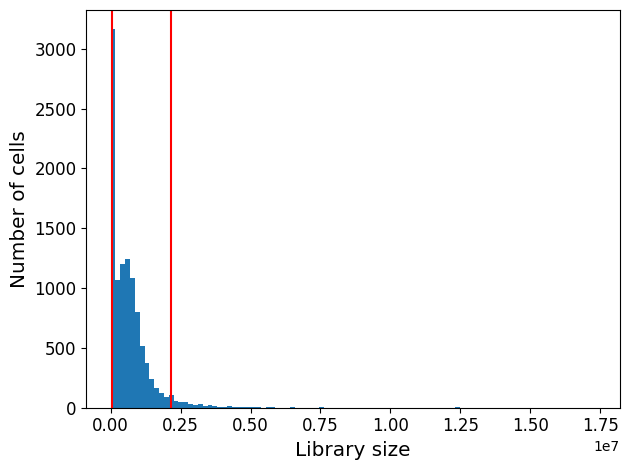

In [12]:
percentiles = ( 16 , 96)
scprep.plot.plot_library_size(data, log=False, percentile=percentiles)

In [14]:
percentiles = (16, 96)  
data, metadata = scprep.filter.filter_library_size(data, metadata, percentile=percentiles)

<AxesSubplot:title={'center':'Gene capture before filtering'}, xlabel='# of cells with nonzero expression', ylabel='# of genes'>

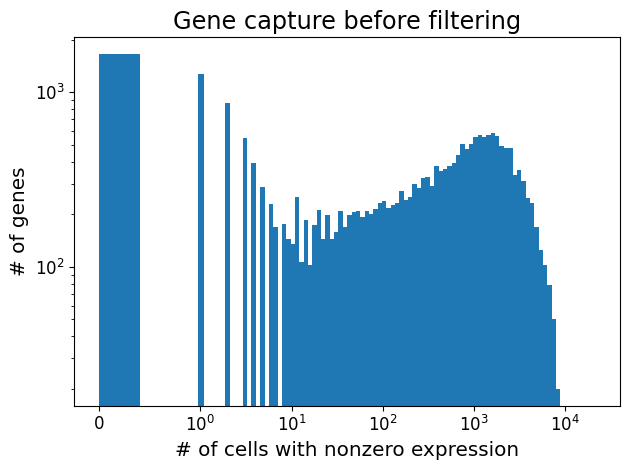

In [15]:
scprep.plot.histogram(scprep.measure.gene_capture_count(data), log=True,
                    title="Gene capture before filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

<AxesSubplot:title={'center':'Gene capture before filtering'}, xlabel='# of cells with nonzero expression', ylabel='# of genes'>

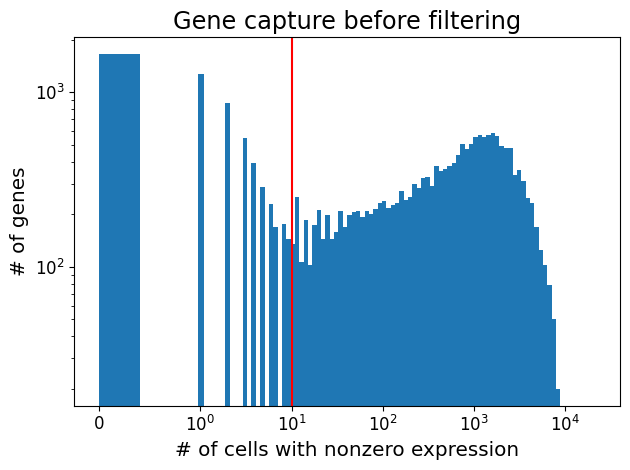

In [16]:
scprep.plot.histogram(scprep.measure.gene_capture_count(data), 
                      cutoff = 10, 
                      log=True,
                      title="Gene capture before filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

In [17]:
cutoff = 10
data = scprep.filter.filter_rare_genes(data, min_cells=cutoff)

<AxesSubplot:title={'center':'Gene capture after filtering'}, xlabel='# of cells with nonzero expression', ylabel='# of genes'>

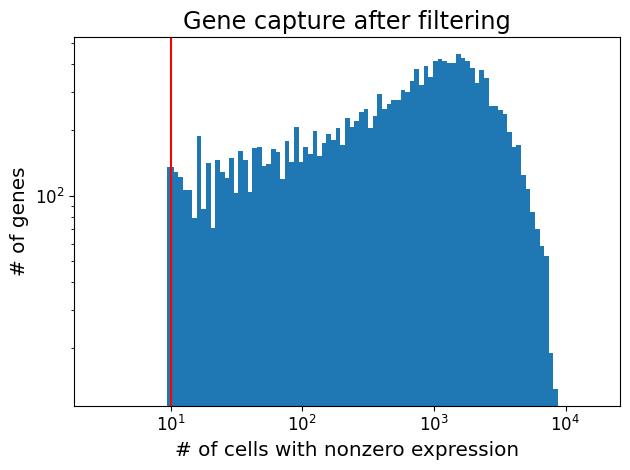

In [21]:
scprep.plot.histogram(scprep.measure.gene_capture_count(data), log=True,
                      cutoff = 10,
                      title="Gene capture after filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

In [22]:
data.shape

(8553, 17706)

<AxesSubplot:title={'center':'Library size before normalization'}, xlabel='Library size', ylabel='Number of cells'>

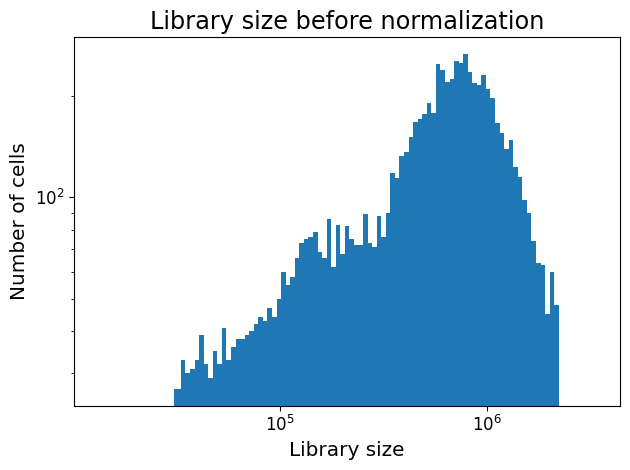

In [23]:
scprep.plot.plot_library_size(data, title='Library size before normalization')

In [24]:
data, metadata['library_size'] = scprep.normalize.library_size_normalize(data, return_library_size=True)

<AxesSubplot:title={'center':'Library size after normalization'}, xlabel='Library size', ylabel='Number of cells'>

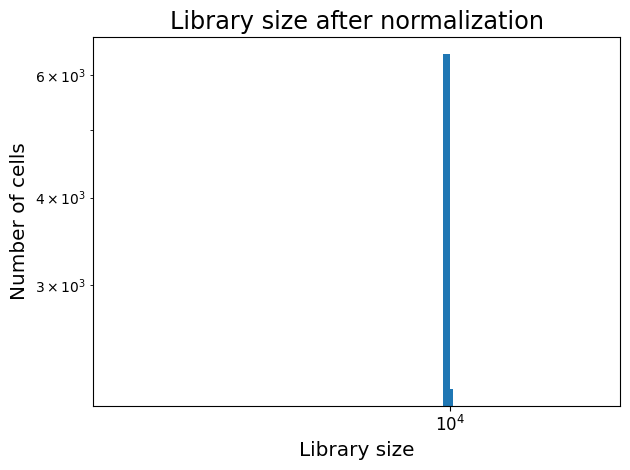

In [25]:
scprep.plot.plot_library_size(data, title='Library size after normalization')

<AxesSubplot:title={'center':'gene counts before transformation'}, xlabel='total number of gene counts', ylabel='number of genes'>

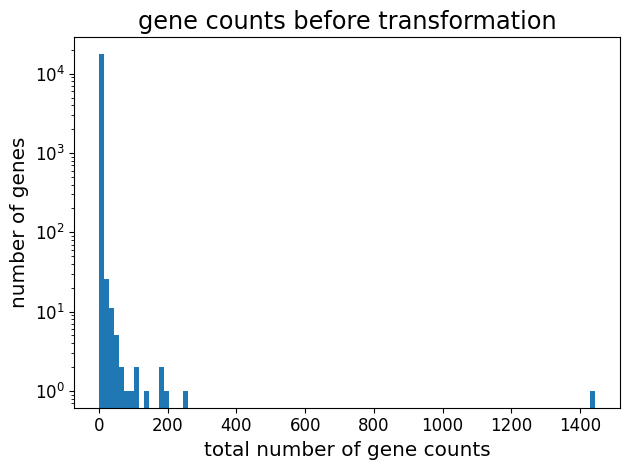

In [26]:
scprep.plot.histogram(data.mean(axis=0), log='y',
                      title= "gene counts before transformation",
                     xlabel= "total number of gene counts",
                     ylabel= "number of genes")

In [27]:
data = scprep.transform.sqrt(data)

<AxesSubplot:title={'center':'gene counts after transformation'}, xlabel='total number of gene counts', ylabel='number of genes'>

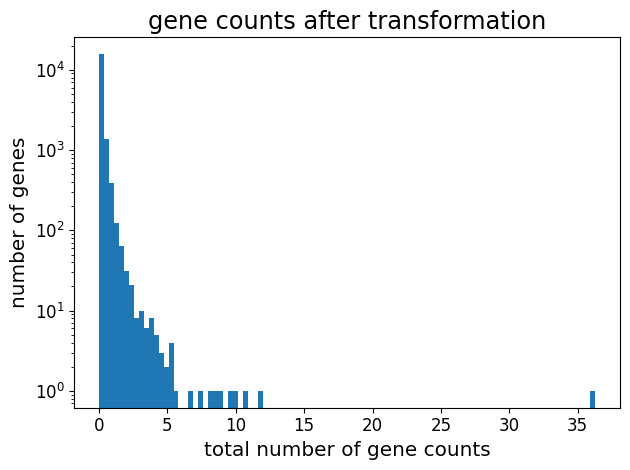

In [28]:
scprep.plot.histogram(data.mean(axis=0), log='y',
                      title= "gene counts after transformation",
                     xlabel= "total number of gene counts",
                     ylabel= "number of genes")

In [29]:
data.to_pickle("data.pickle.gz") 
metadata.to_pickle("metadata.pickle.gz")  

In [4]:
data = pd.read_pickle('data.pickle.gz')
metadata = pd.read_pickle('metadata.pickle.gz')

In [6]:
data_pca = scprep.reduce.pca(data, n_components=50, method='dense')

In [7]:
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
O5.MAA000570.3_8_M.1.1_myeloid_data,-28.065935,1.312056,-0.608981,4.578492,12.960941,0.030464,1.444040,-1.581370,-0.417065,0.610159,...,1.966201,-0.708670,0.796787,2.098624,1.919272,-0.460854,0.088429,0.744347,-3.140391,-2.831868
C3.MAA000570.3_8_M.1.1_myeloid_data,-24.055492,4.180497,0.110219,5.555223,10.154639,1.205582,-0.343491,-2.724487,-1.016803,4.370457,...,-4.557396,0.847930,2.402434,-3.420709,-2.117152,-2.881706,-1.614249,2.944203,-1.166378,-0.454069
F17.MAA000570.3_8_M.1.1_myeloid_data,-24.879207,9.521774,0.362985,3.074238,8.989499,0.971900,-0.222368,-4.711305,0.862565,6.788278,...,2.223565,-0.695552,-1.742390,3.373709,0.730927,-1.155981,1.284990,-1.571243,-1.504268,-0.595776
I17.MAA000570.3_8_M.1.1_myeloid_data,-23.412436,2.899345,0.687111,6.431797,13.984745,1.438077,1.181779,-1.720557,-0.484073,3.291282,...,0.603584,-2.134907,2.017897,3.025889,1.082733,-1.005758,-1.517718,-0.464555,1.366972,-1.062965
K17.MAA000570.3_8_M.1.1_myeloid_data,-19.098953,12.593157,-2.432076,0.872228,5.321115,0.620668,-1.550610,-6.620293,0.182405,7.266466,...,1.245348,3.066672,0.537312,4.648412,-3.060293,-2.048076,-1.448106,-1.180950,0.267854,0.659262


In [ ]:
fig, axes = plt.subplots(2,3, figsize=(12,8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    legend = True if i == 2 else False
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=metadata['subtissue'],
                        cmap='Spectral', ax=ax,
                        label_prefix="PC", legend=legend)
fig.tight_layout()

If we add index to the annotation of the PCs :

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(12,8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    legend = True if i == 2 else False
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=metadata['subtissue'],
                        cmap='Spectral', ax=ax,
                        xlabel="PC_" + str(i+1), ylabel="PC_" + str(i+2), legend=legend)
fig.tight_layout() 

In [ ]:
metadata.head()

,plate.barcode,mouse.id,tissue,subtissue,FACS.selection,mouse.sex,library_size
O5.MAA000570.3_8_M.1.1_myeloid_data,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M,732851.0
C3.MAA000570.3_8_M.1.1_myeloid_data,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M,777301.0
F17.MAA000570.3_8_M.1.1_myeloid_data,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M,553410.0
I17.MAA000570.3_8_M.1.1_myeloid_data,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M,717129.0
K17.MAA000570.3_8_M.1.1_myeloid_data,MAA000570,3_8_M,Brain_Myeloid,Cerebellum,Microglia,M,479074.0


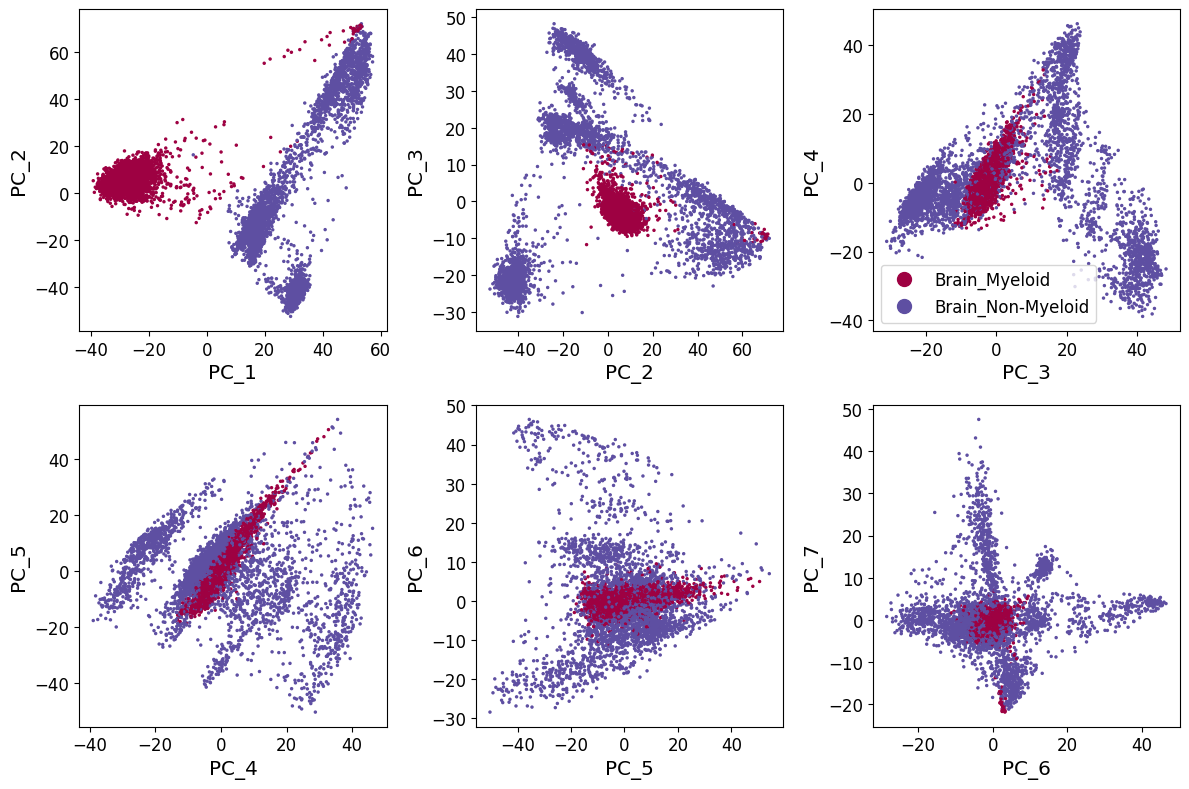

In [11]:
fig, axes = plt.subplots(2,3, figsize=(12,8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    legend = True if i == 2 else False
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=metadata['tissue'],
                        cmap='Spectral', ax=ax,
                        xlabel="PC_" + str(i+1), ylabel="PC_" + str(i+2), legend=legend)
fig.tight_layout() 

#### Plotting expression of a gene on the first two PCs

Now let's plot expression of some genes!


In [12]:
data.head()

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,0610009L18Rik,...,Zwilch,Zwint,Zxda,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6
O5.MAA000570.3_8_M.1.1_myeloid_data,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.495597,0.0,0.0,0.0,1.435425,0.0,0.309059,0.70088,0.0
C3.MAA000570.3_8_M.1.1_myeloid_data,0.0,2.115899,0.0,0.0,0.0,2.970759,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
F17.MAA000570.3_8_M.1.1_myeloid_data,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.134424,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
I17.MAA000570.3_8_M.1.1_myeloid_data,0.0,0.000000,0.0,0.0,0.0,0.425768,1.694864,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0
K17.MAA000570.3_8_M.1.1_myeloid_data,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0


<AxesSubplot:title={'center':'Sp1'}, xlabel='PC1', ylabel='PC2'>

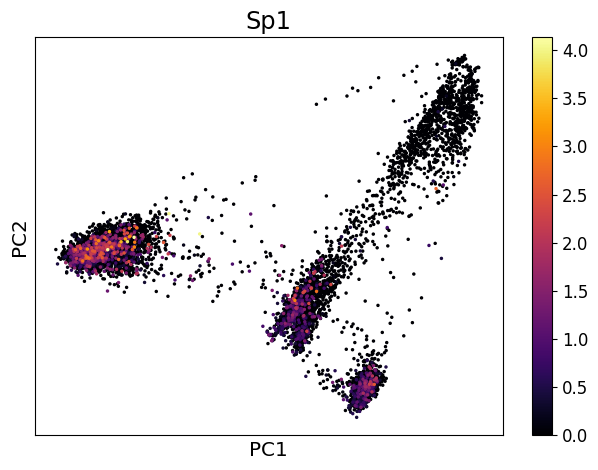

In [13]:
expression = scprep.select.select_cols(data, exact_word='Sp1')

sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Sp1', ticks=None, label_prefix='PC')


<AxesSubplot:title={'center':'Rn45s'}, xlabel='PC1', ylabel='PC2'>

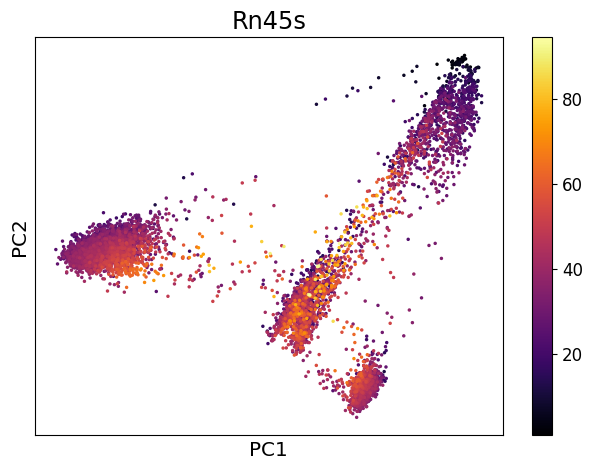

In [14]:
expression = scprep.select.select_cols(data, exact_word='Rn45s')
sort_index = expression.sort_values().index

scprep.plot.scatter2d( data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Rn45s', ticks=None, label_prefix='PC' )
                      

In [15]:
import umap.umap_ as umap
data_umap = umap.UMAP().fit_transform(data_pca.iloc[:,:50])

In [16]:
data_umap = pd.DataFrame(data_umap, index = data.index)

In [17]:
%matplotlib inline

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

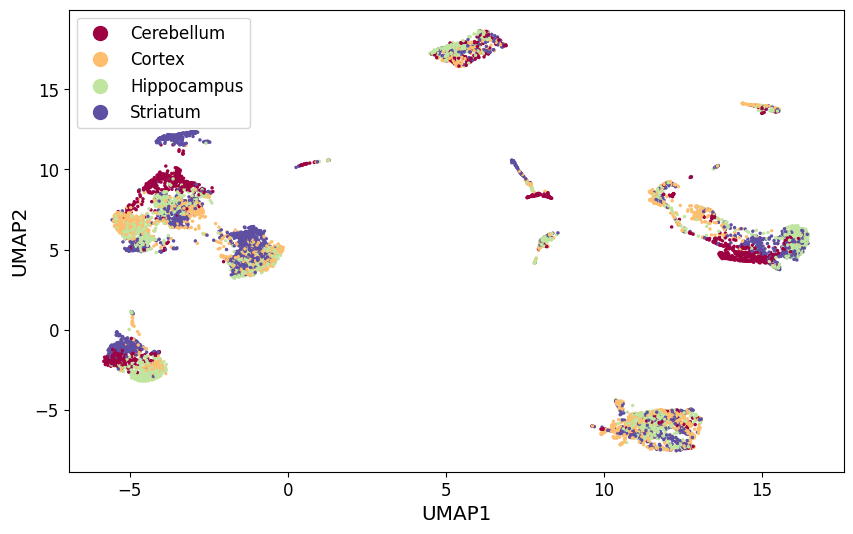

In [50]:
fig, ax = plt.subplots(figsize=(10,6)) 

scprep.plot.scatter2d( 
  data=data_umap,
  c=metadata['subtissue'], ax=ax,
  cmap='Spectral', label_prefix="UMAP"
)

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

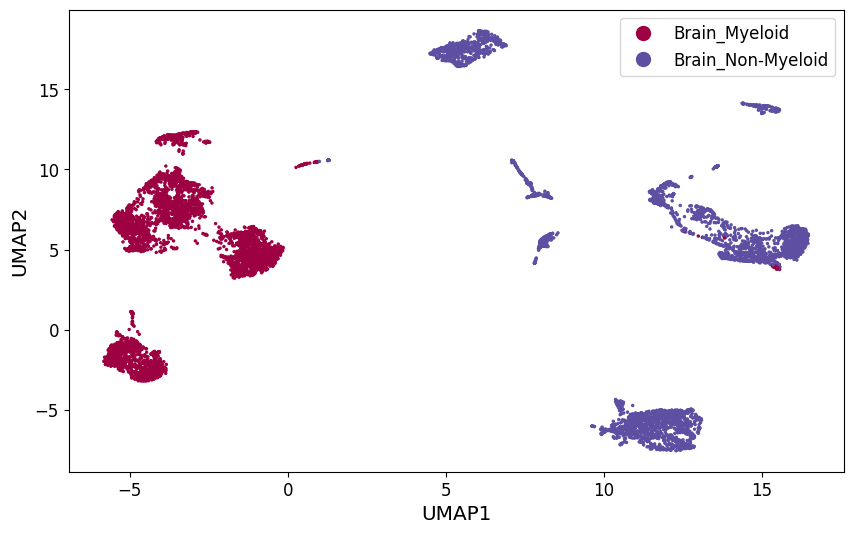

In [51]:
fig, ax = plt.subplots(figsize=(10,6)) 

scprep.plot.scatter2d( 
  data=data_umap,
  c=metadata['tissue'], ax=ax,
  cmap='Spectral', label_prefix="UMAP"
)


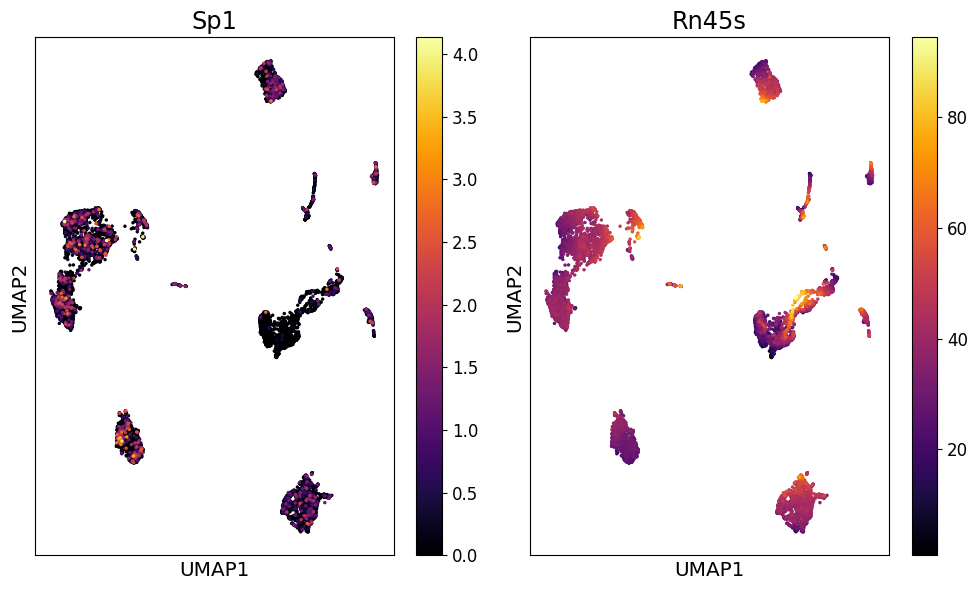

In [21]:
genes_for_plotting = ['Sp1', 'Rn45s']
fig, axes = plt.subplots(1, 2, figsize=(10,6))

for gene, ax in zip(genes_for_plotting, axes.flatten()):
    expression = scprep.select.select_cols(data, exact_word=gene) 
    sort_index = expression.sort_values().index 

    scprep.plot.scatter2d( data_umap.loc[sort_index], c=expression.loc[sort_index],
                          shuffle=False, title=gene, 
                          label_prefix='UMAP', ticks=None, ax=ax)
fig.tight_layout()

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

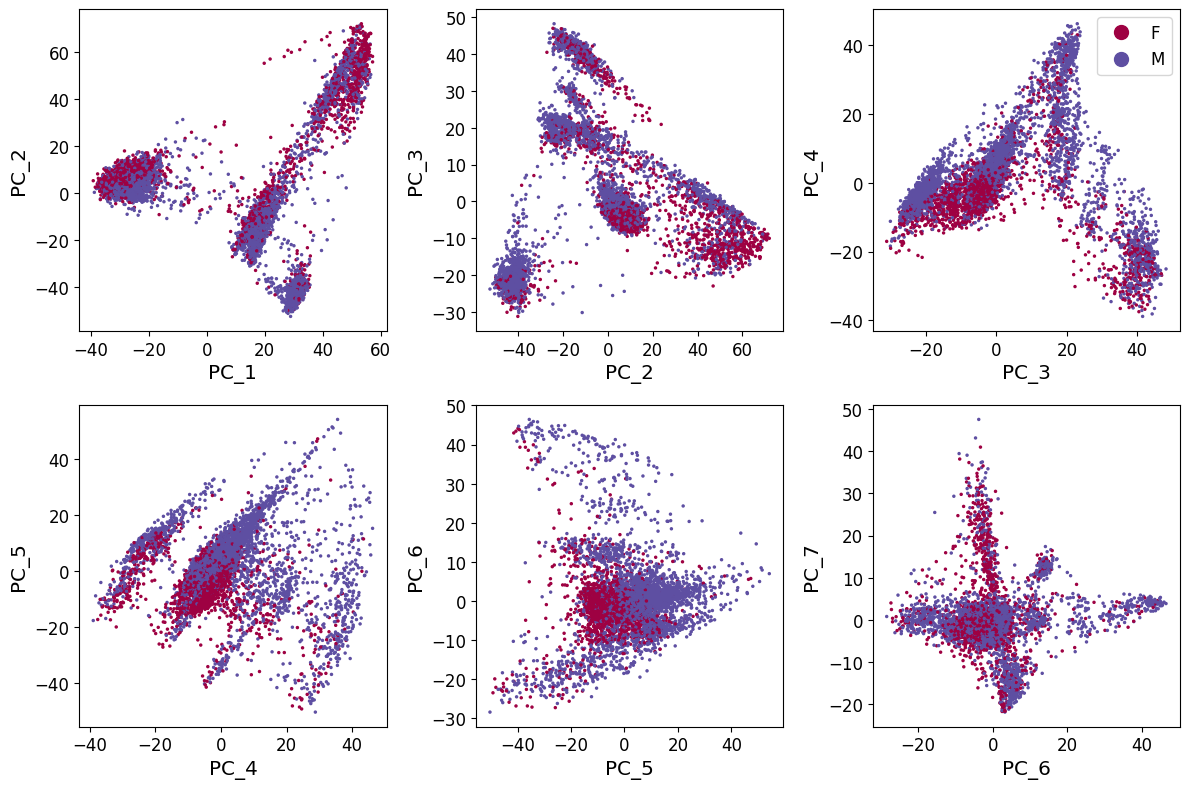

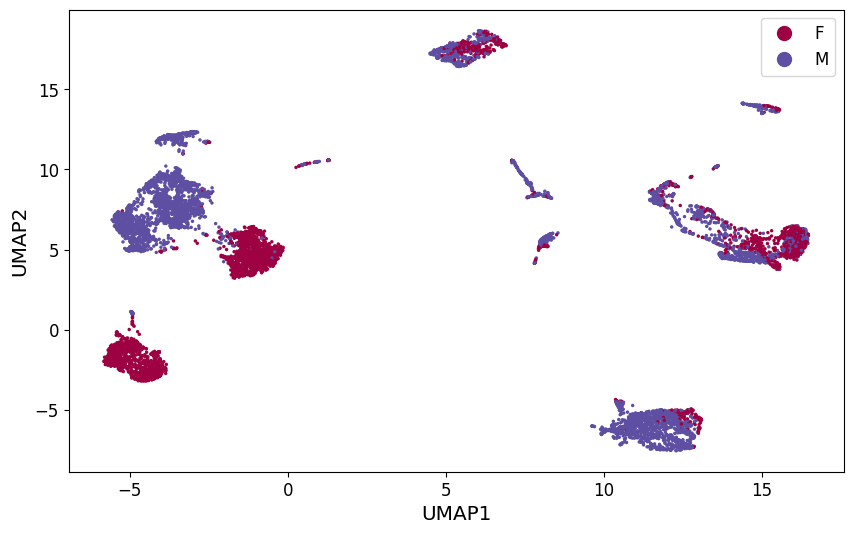

In [53]:
fig, axes = plt.subplots(2,3, figsize=(12,8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    legend = True if i == 2 else False
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=metadata['mouse.sex'],
                        cmap='Spectral', ax=ax,
                        xlabel="PC_" + str(i+1), ylabel="PC_" + str(i+2), legend=legend)
fig.tight_layout() 

# UMAP
fig, ax = plt.subplots(figsize=(10,6)) 
scprep.plot.scatter2d( 
  data=data_umap,
  c=metadata['mouse.sex'], ax=ax,
  cmap='Spectral', label_prefix="UMAP"
)

In [13]:
phate_op = phate.PHATE(knn=7, n_jobs=-2)

data_phate = phate_op.fit_transform(data_pca.iloc[:,:50])
data_phate = pd.DataFrame(data_phate, index=data.index)

Calculating PHATE...
  Running PHATE on 8553 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 1.52 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 1.60 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.95 seconds.
    Calculating KMeans...
    Calculated KMeans in 8.19 seconds.
  Calculated landmark operator in 11.32 seconds.
  Calculating optimal t...
    Automatically selected t = 31
  Calculated optimal t in 4.04 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.78 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 6.28 seconds.
Calculated PHATE in 25.02 seconds.


<AxesSubplot:xlabel='phate1', ylabel='phate2'>

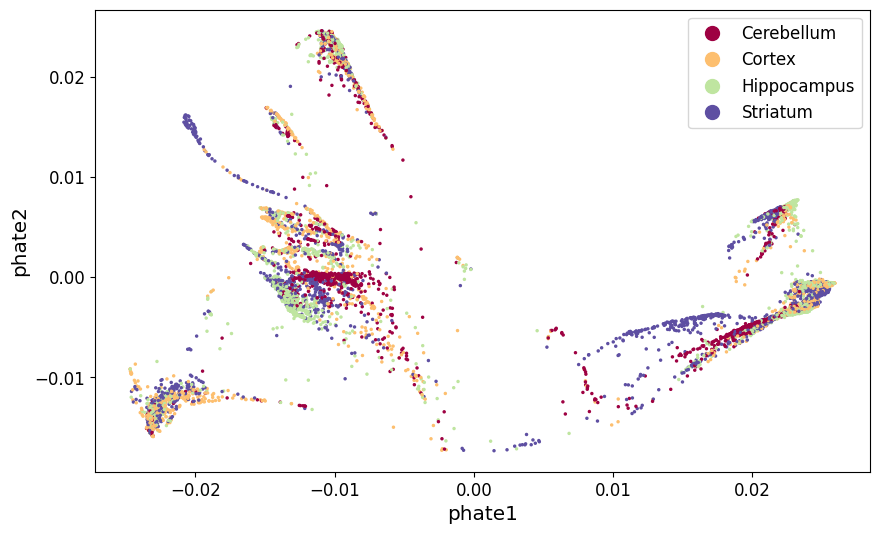

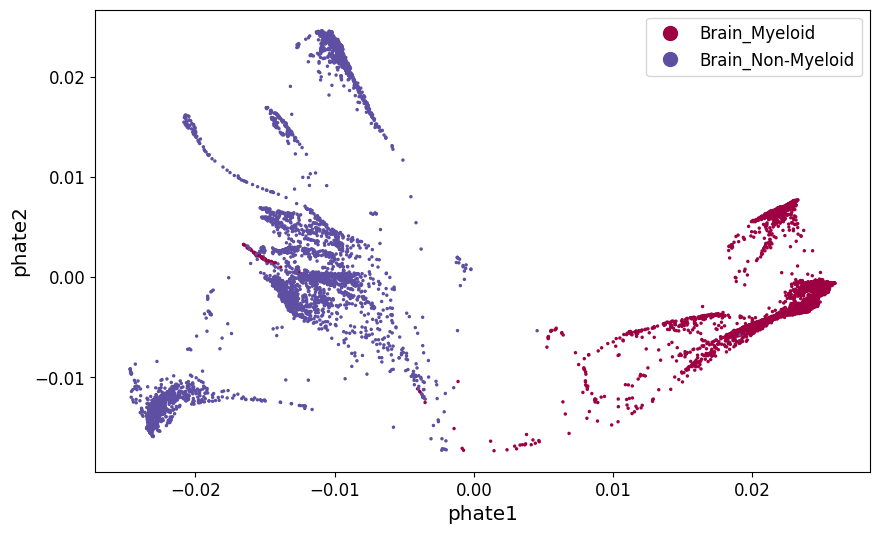

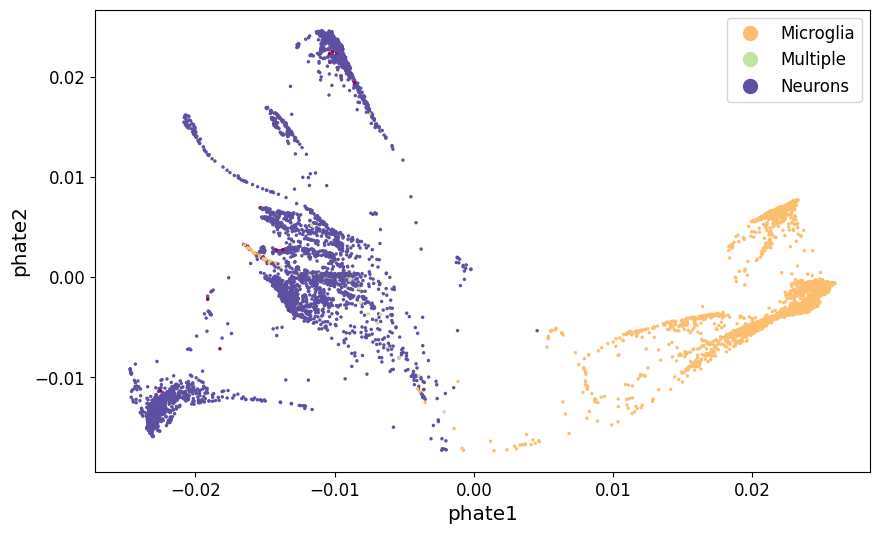

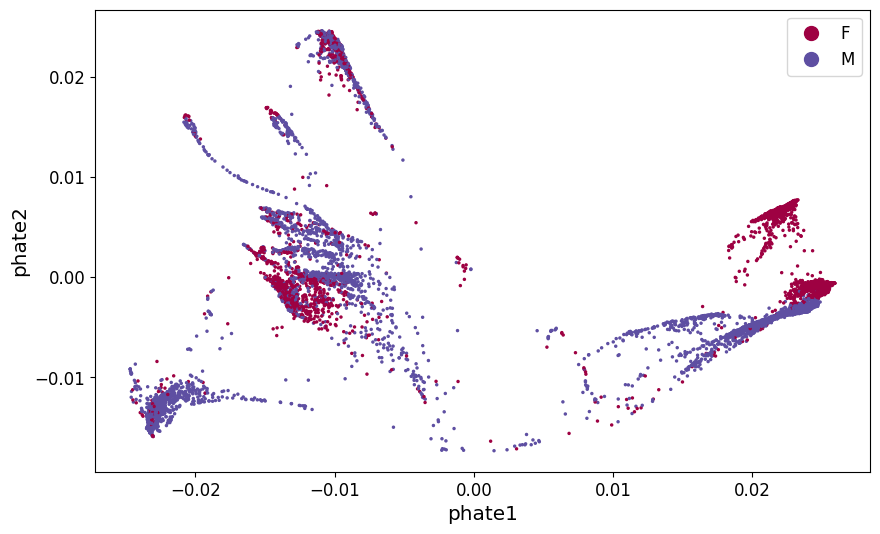

In [18]:
fig, ax = plt.subplots(figsize=(10,6)) 

scprep.plot.scatter2d( 
  data=data_phate,
  c=metadata['subtissue'], ax=ax,
  cmap='Spectral', label_prefix="phate"
)

fig, ax = plt.subplots(figsize=(10,6))

scprep.plot.scatter2d( 
  data=data_phate,
  c=metadata['tissue'], ax=ax,
  cmap='Spectral', label_prefix="phate"
)
fig, ax = plt.subplots(figsize=(10,6)) 
scprep.plot.scatter2d( 
  data=data_phate,
  c=metadata['FACS.selection'], ax=ax,
  cmap='Spectral', label_prefix="phate"
)
fig, ax = plt.subplots(figsize=(10,6)) 
scprep.plot.scatter2d( 
  data=data_phate,
  c=metadata['mouse.sex'], ax=ax,
  cmap='Spectral', label_prefix="phate"
)

#### Gene visualization

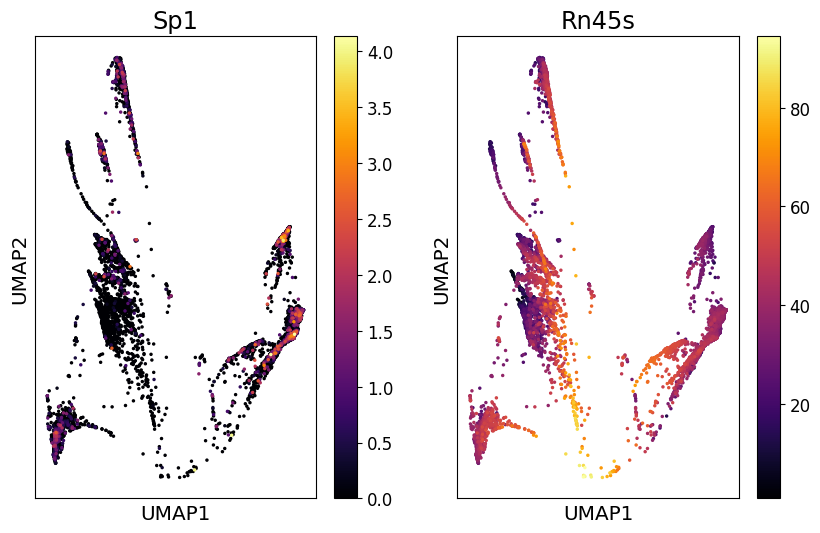

In [20]:
genes_for_plotting = ['Sp1', 'Rn45s']
fig, axes = plt.subplots(1, 2, figsize=(10,6))

for gene, ax in zip(genes_for_plotting, axes.flatten()):
    expression = scprep.select.select_cols(data, exact_word=gene)
    sort_index = expression.sort_values().index

    scprep.plot.scatter2d( data_phate.loc[sort_index], c=expression.loc[sort_index],
                          shuffle=False, title=gene, 
                          label_prefix='UMAP', ticks=None, ax=ax)